In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe() # some features min values is 0 (means null values)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


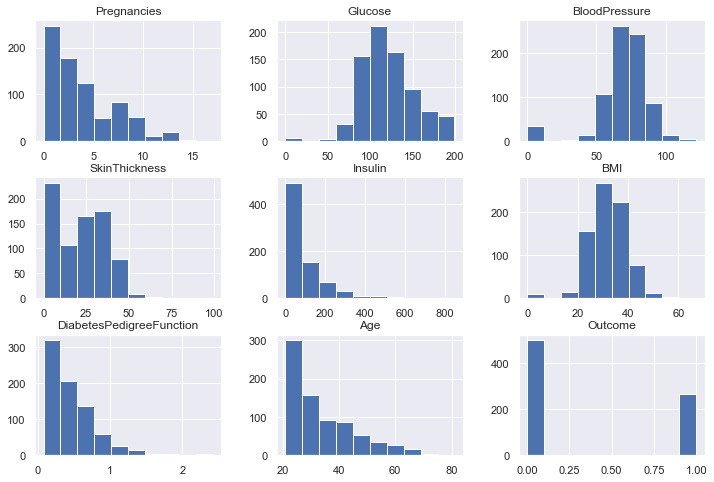

In [9]:
df.hist(figsize=(12,8)) # overview of data distribution
plt.show()

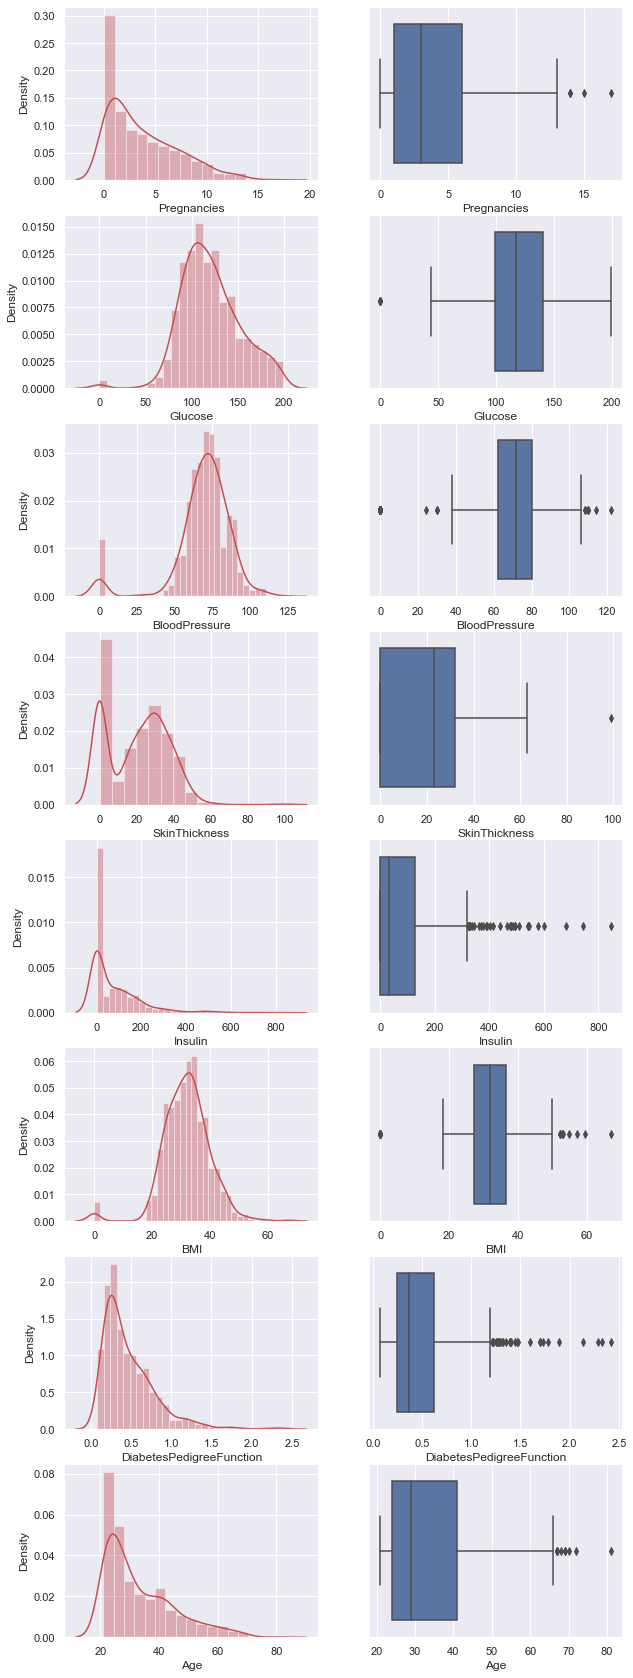

In [10]:
plt.figure(figsize=(10,30))

plt.subplot(8,2,1)
sns.distplot(df['Pregnancies'], color='r')
plt.subplot(8,2,2)
sns.boxplot(df['Pregnancies'])

plt.subplot(8,2,3)
sns.distplot(df['Glucose'], color='r')
plt.subplot(8,2,4)
sns.boxplot(df['Glucose'])

plt.subplot(8,2,5)
sns.distplot(df['BloodPressure'], color='r')
plt.subplot(8,2,6)
sns.boxplot(df['BloodPressure'])

plt.subplot(8,2,7)
sns.distplot(df['SkinThickness'], color='r')
plt.subplot(8,2,8)
sns.boxplot(df['SkinThickness'])

plt.subplot(8,2,9)
sns.distplot(df['Insulin'], color='r')
plt.subplot(8,2,10)
sns.boxplot(df['Insulin'])

plt.subplot(8,2,11)
sns.distplot(df['BMI'], color='r')
plt.subplot(8,2,12)
sns.boxplot(df['BMI'])

plt.subplot(8,2,13)
sns.distplot(df['DiabetesPedigreeFunction'], color='r')
plt.subplot(8,2,14)
sns.boxplot(df['DiabetesPedigreeFunction'])

plt.subplot(8,2,15)
sns.distplot(df['Age'], color='r')   # data has 0 values and outliers
plt.subplot(8,2,16)
sns.boxplot(df['Age'])

plt.show()

0    500
1    268
Name: Outcome, dtype: int64


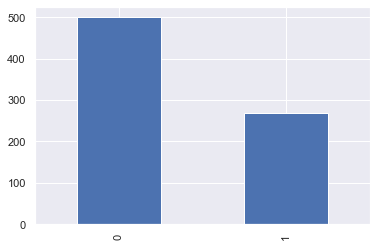

In [11]:
df['Outcome'].value_counts().plot(kind='bar') # ''' data is imbalaced. tree based algoriths are good for imbalaced data
print(df['Outcome'].value_counts())           #     there some others techniques too like under sampling and over sampling '''

In [12]:
df.corr()['Outcome'] # correlation with 'Outcome'

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

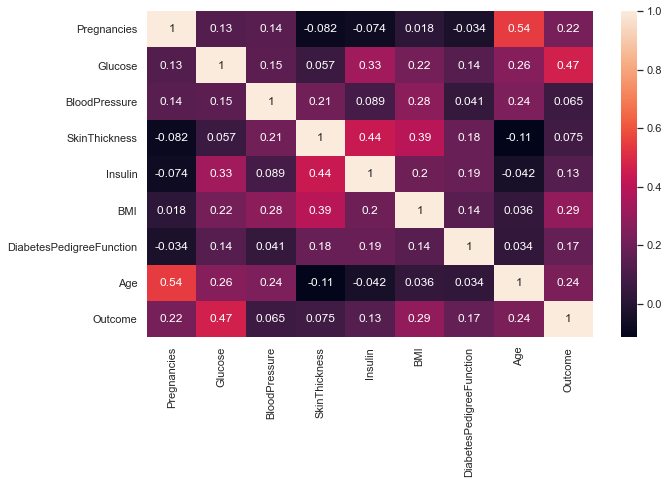

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [14]:
# droping 'BloodPressure', 'SkinThickness', and 'Insulin'..  Insulin has lots of 0 means nan values and outliers

df.drop(columns=['BloodPressure', 'SkinThickness', 'Insulin'], axis=1, inplace=True)

In [15]:
df.head(2)

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0


### Outliers

In [16]:
# IQR

per75 = df['Pregnancies'].quantile(0.75)
per25 = df['Pregnancies'].quantile(0.25)

In [17]:
iqr = per75 - per25

In [18]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [19]:
print('upper limit: ', upper_limit)
print('lower limit: ', lower_limit)

upper limit:  13.5
lower limit:  -6.5


In [20]:
df[(df['Pregnancies'] > upper_limit) | (df['Pregnancies'] < lower_limit)] # here is the outliers

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,37.1,0.153,43,1
159,17,163,40.9,0.817,47,1
298,14,100,36.6,0.412,46,1
455,14,175,33.6,0.212,38,1


In [21]:
# we have less data so we going to keep

df['Pregnancies'] = np.where(df['Pregnancies'] > upper_limit,
                            upper_limit,
                            np.where(df['Pregnancies'] < lower_limit,
                                    lower_limit,
                                    df['Pregnancies']))

In [22]:
# 3 and -3 standard deviation

print('upper limit: ', df['Glucose'].mean() + 3 * df['Glucose'].std())
print('lower limit: ', df['Glucose'].mean() - 3 * df['Glucose'].std())

upper limit:  216.81238583540866
lower limit:  24.976676664591338


In [23]:
df[(df['Glucose'] > 216.81) | (df['Glucose'] < 24.97)] # outliers are 0's basically they are nan values we will use mean, median

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,0,24.7,0.140,22,0
182,1.0,0,27.7,0.299,21,0
342,1.0,0,32.0,0.389,22,0
349,5.0,0,41.0,0.346,37,1
502,6.0,0,39.0,0.727,41,1


In [24]:
df['Glucose'].replace(0,np.nan, inplace=True)
df['BMI'].replace(0,np.nan, inplace=True)

In [25]:
print('upper limit: ', df['BMI'].mean() + 3 * df['BMI'].std())
print('lower limit: ', df['BMI'].mean() - 3 * df['BMI'].std())

upper limit:  53.23242866870872
lower limit:  11.682498676073308


In [26]:
df[(df['BMI'] > 53.23) | (df['BMI'] < 11.68)]

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
125,1.0,88.0,55.0,0.496,26,1
177,0.0,129.0,67.1,0.319,26,1
445,0.0,180.0,59.4,2.420,25,1
673,3.0,123.0,57.3,0.880,22,0


In [27]:
df['BMI'] = np.where(df['BMI'] > 53.23,
                    53.23,
                    np.where(df['BMI'] < 11.68,
                            11.68,
                            df['BMI']))

In [28]:
df.isnull().sum()

Pregnancies                  0
Glucose                      5
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [29]:
print('Glucose mean:',df['Glucose'].mean(), 'Glucose median:',df['Glucose'].median())
print('BMI mean:',df['BMI'].mean(), 'BMI median:',df['BMI'].median())

Glucose mean: 121.6867627785059 Glucose median: 117.0
BMI mean: 32.42327608982827 BMI median: 32.3


In [30]:
df['Glucose'].fillna(121, inplace=True)
df['BMI'].fillna(32.3, inplace = True)

In [31]:
df['Pregnancies'] = df['Pregnancies'].astype('int64')
df['Glucose'] = df['Glucose'].astype('int64')

In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=2)

In [34]:
print('X_train.shape:',X_train.shape, 'X_test.shape:',X_test.shape, 'y_train.shape:',y_train.shape, 'y_test.shape:',y_test.shape)

X_train.shape: (614, 5) X_test.shape: (154, 5) y_train.shape: (614,) y_test.shape: (154,)


In [35]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# we have less data, outliers and imbalaced data that's why we are using ensemble techniques

In [62]:
# RandomForest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_p_r = rf.predict(X_test)

In [63]:
print('accuracy:',accuracy_score(y_p_r, y_test))
print('************************************************')
print(confusion_matrix(y_p_r,y_test))
print('************************************************')
print(classification_report(y_p_r,y_test))

accuracy: 0.7922077922077922
************************************************
[[90 22]
 [10 32]]
************************************************
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       112
           1       0.59      0.76      0.67        42

    accuracy                           0.79       154
   macro avg       0.75      0.78      0.76       154
weighted avg       0.82      0.79      0.80       154



In [38]:
# ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train,y_train)
y_p_e = et.predict(X_test)

In [39]:
print('accuracy:',accuracy_score(y_p_e, y_test))
print('************************************************')
print(confusion_matrix(y_p_e,y_test))
print('************************************************')
print(classification_report(y_p_e,y_test))

accuracy: 0.7727272727272727
************************************************
[[88 23]
 [12 31]]
************************************************
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       111
           1       0.57      0.72      0.64        43

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.78       154



In [40]:
# AdaBoostClassifier
ab = AdaBoostClassifier()

ab.fit(X_train,y_train)
y_p_a = ab.predict(X_test)

In [41]:
print('accuracy:',accuracy_score(y_p_a, y_test))
print('************************************************')
print(confusion_matrix(y_p_a,y_test))
print('************************************************')
print(classification_report(y_p_a,y_test))

accuracy: 0.7532467532467533
************************************************
[[87 25]
 [13 29]]
************************************************
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       112
           1       0.54      0.69      0.60        42

    accuracy                           0.75       154
   macro avg       0.70      0.73      0.71       154
weighted avg       0.78      0.75      0.76       154



In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rf_params = {
    'n_estimators':[60,70,80,100],
    'criterion':["gini", "entropy"],
    'max_depth':[2,4,6,8,None]
}

In [44]:
grid = GridSearchCV(rf, param_grid=rf_params, cv=5, n_jobs=-1)

In [45]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, None],
                         'n_estimators': [60, 70, 80, 100]})

In [46]:
grid.best_score_

0.7751566040250566

In [47]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 70}

In [48]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))

In [49]:
# lets try some algos

In [50]:
from sklearn.svm import SVC

In [51]:
# svc
svc = SVC()
svc.fit(X_train,y_train)
y_p_s = svc.predict(X_test)

In [52]:
print('accuracy:',accuracy_score(y_p_s, y_test))
print('************************************************')
print(confusion_matrix(y_p_s,y_test))
print('************************************************')
print(classification_report(y_p_s,y_test))

accuracy: 0.7597402597402597
************************************************
[[92 29]
 [ 8 25]]
************************************************
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       121
           1       0.46      0.76      0.57        33

    accuracy                           0.76       154
   macro avg       0.69      0.76      0.70       154
weighted avg       0.82      0.76      0.78       154



In [53]:
# ANN

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler # we have to scale the data before train Ann model

In [55]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [56]:
X_train.shape

(614, 5)

In [57]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim=5))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model.fit(X_train_s, y_train, batch_size=10, epochs=200, verbose=1, validation_data=(X_test_s,y_test))

Epoch 1/200
62/62 [==============================] - 1s 7ms/step - loss: 0.6263 - accuracy: 0.6759 - val_loss: 0.5750 - val_accuracy: 0.6623
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.6889 - val_loss: 0.5282 - val_accuracy: 0.7013
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7199 - val_loss: 0.5020 - val_accuracy: 0.7208
Epoch 4/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.7508 - val_loss: 0.4870 - val_accuracy: 0.7273
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7638 - val_loss: 0.4727 - val_accuracy: 0.7662
Epoch 6/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7720 - val_loss: 0.4640 - val_accuracy: 0.7727
Epoch 7/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7785 - val_loss: 0.4607 - val_accuracy: 0.7662
Epoch 8/200
6

Epoch 59/200
62/62 [==============================] - 0s 5ms/step - loss: 0.4156 - accuracy: 0.7899 - val_loss: 0.4741 - val_accuracy: 0.7727
Epoch 60/200
62/62 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.7883 - val_loss: 0.4780 - val_accuracy: 0.7662
Epoch 61/200
62/62 [==============================] - 0s 5ms/step - loss: 0.4154 - accuracy: 0.7883 - val_loss: 0.4769 - val_accuracy: 0.7662
Epoch 62/200
62/62 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.7834 - val_loss: 0.4785 - val_accuracy: 0.7662
Epoch 63/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.7883 - val_loss: 0.4775 - val_accuracy: 0.7597
Epoch 64/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.7932 - val_loss: 0.4770 - val_accuracy: 0.7597
Epoch 65/200
62/62 [==============================] - 0s 4ms/step - loss: 0.4138 - accuracy: 0.7834 - val_loss: 0.4779 - val_accuracy: 0.7597
Epoch 

62/62 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.7932 - val_loss: 0.4912 - val_accuracy: 0.7532
Epoch 117/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.7899 - val_loss: 0.4876 - val_accuracy: 0.7532
Epoch 118/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.7948 - val_loss: 0.4878 - val_accuracy: 0.7597
Epoch 119/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.7932 - val_loss: 0.4920 - val_accuracy: 0.7532
Epoch 120/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.7915 - val_loss: 0.4914 - val_accuracy: 0.7532
Epoch 121/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.7948 - val_loss: 0.4938 - val_accuracy: 0.7532
Epoch 122/200
62/62 [==============================] - 0s 3ms/step - loss: 0.4006 - accuracy: 0.7915 - val_loss: 0.4915 - val_accuracy: 0.7532
Epoch 123/200

62/62 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.7948 - val_loss: 0.4994 - val_accuracy: 0.7597
Epoch 174/200
62/62 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.7883 - val_loss: 0.4988 - val_accuracy: 0.7727
Epoch 175/200
62/62 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.7997 - val_loss: 0.5010 - val_accuracy: 0.7597
Epoch 176/200
62/62 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.7948 - val_loss: 0.5002 - val_accuracy: 0.7727
Epoch 177/200
62/62 [==============================] - 0s 3ms/step - loss: 0.3894 - accuracy: 0.7980 - val_loss: 0.4987 - val_accuracy: 0.7662
Epoch 178/200
62/62 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.7964 - val_loss: 0.4989 - val_accuracy: 0.7727
Epoch 179/200
62/62 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.7932 - val_loss: 0.4975 - val_accuracy: 0.7727
Epoch 180/200

In [59]:
yp = model.predict(X_test_s)

In [60]:
ypred_a = []

for i in yp:
    if i > 0.5:
        ypred_a.append(1)
    else:
        ypred_a.append(0)

In [61]:
ypred_a

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1]